#### This notebook trains our baseline model

Imports

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
os.chdir("../models")
from model import CustomCNN
from common_utils import set_seed, EarlyStopper, train, get_mean_rgb, CustomTransform

# set seed
set_seed(42)

Initialise model and dataset

In [2]:
model = CustomCNN() # initialise model

mean_rgb = get_mean_rgb(datasets.Flowers102(root='../data', split='test', download=True, transform=transforms.ToTensor())) # get mean rgb values of dataset
transform = CustomTransform(mean_rgb) # initialise transform

# load data
train_dataset = datasets.Flowers102(root='../data', split='test', download=True, transform=transform) 
val_dataset = datasets.Flowers102(root='../data', split='val', download=True, transform=transform) 
test_dataset = datasets.Flowers102(root='../data', split='train', download=True, transform=transform)
# NOTE: Due to a bug with the Flowers102 dataset, the train and test splits are swapped

# initialise dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Specify hyperparameters

In [3]:
lr = 0.001 # learning rate
optimiser = torch.optim.Adam(model.parameters(), lr=lr) # initialise optimiser
loss = torch.nn.CrossEntropyLoss() # initialise loss function

if torch.cuda.is_available(): # nvidia gpu
    device = torch.device("cuda")
elif torch.backends.mps.is_available(): # apple gpu
    device = torch.device("mps")
else:
    device = torch.device("cpu")
model.to(device)

epochs = 100 # number of epochs
early_stopper = EarlyStopper(patience=10) # initialise early stopper


# Make directory to save baseline model
baseline_model_path = "./saved_models/baseline_model"
if not os.path.exists(baseline_model_path):
    os.mkdir(baseline_model_path)

# Define the device-specific path
device_type = None
if device == torch.device("cuda"):
    device_type = "cuda"
elif device == torch.device("mps"):
    device_type = "mps"
else:
    device_type = "cpu"

# Construct the full path
device_path = os.path.join(baseline_model_path, device_type)

# Create the directory if it doesn't exist
if not os.path.exists(device_path):
    os.mkdir(device_path)

Train the model

In [4]:
train_loss_list, val_loss_list, val_acc_list = train(model, train_dataloader, val_dataloader, optimiser, loss, device, epochs, early_stopper, device_path) # train model

Epoch 1/100: 100%|██████████| 193/193 [01:39<00:00,  1.94it/s, Training loss=4.4134]


Epoch 1/100 took 109.21s | Train loss: 4.4134 | Val loss: 4.6038 | Val accuracy: 1.96% | EarlyStopper count: 0


Epoch 2/100: 100%|██████████| 193/193 [01:42<00:00,  1.89it/s, Training loss=4.1121]


Epoch 2/100 took 112.78s | Train loss: 4.1121 | Val loss: 4.3840 | Val accuracy: 2.06% | EarlyStopper count: 0


Epoch 3/100: 100%|██████████| 193/193 [01:36<00:00,  2.00it/s, Training loss=4.0124]


Epoch 3/100 took 105.62s | Train loss: 4.0124 | Val loss: 4.3399 | Val accuracy: 2.45% | EarlyStopper count: 0


Epoch 4/100: 100%|██████████| 193/193 [01:38<00:00,  1.95it/s, Training loss=3.9102]


Epoch 4/100 took 110.10s | Train loss: 3.9102 | Val loss: 4.2618 | Val accuracy: 4.31% | EarlyStopper count: 0


Epoch 5/100: 100%|██████████| 193/193 [01:43<00:00,  1.86it/s, Training loss=3.7763]


Epoch 5/100 took 114.03s | Train loss: 3.7763 | Val loss: 4.0708 | Val accuracy: 5.49% | EarlyStopper count: 0


Epoch 6/100: 100%|██████████| 193/193 [01:37<00:00,  1.99it/s, Training loss=3.6190]


Epoch 6/100 took 105.89s | Train loss: 3.6190 | Val loss: 3.8234 | Val accuracy: 7.06% | EarlyStopper count: 0


Epoch 7/100: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s, Training loss=3.4404]


Epoch 7/100 took 101.21s | Train loss: 3.4404 | Val loss: 3.6909 | Val accuracy: 9.51% | EarlyStopper count: 0


Epoch 8/100: 100%|██████████| 193/193 [01:31<00:00,  2.10it/s, Training loss=3.2848]


Epoch 8/100 took 103.45s | Train loss: 3.2848 | Val loss: 3.5516 | Val accuracy: 13.33% | EarlyStopper count: 0


Epoch 9/100: 100%|██████████| 193/193 [01:35<00:00,  2.01it/s, Training loss=3.1356]


Epoch 9/100 took 106.03s | Train loss: 3.1356 | Val loss: 3.3867 | Val accuracy: 14.02% | EarlyStopper count: 0


Epoch 10/100: 100%|██████████| 193/193 [01:49<00:00,  1.76it/s, Training loss=3.0056]


Epoch 10/100 took 118.71s | Train loss: 3.0056 | Val loss: 3.2907 | Val accuracy: 15.98% | EarlyStopper count: 0


Epoch 11/100: 100%|██████████| 193/193 [01:51<00:00,  1.73it/s, Training loss=2.8856]


Epoch 11/100 took 120.45s | Train loss: 2.8856 | Val loss: 3.2165 | Val accuracy: 17.75% | EarlyStopper count: 0


Epoch 12/100: 100%|██████████| 193/193 [01:32<00:00,  2.10it/s, Training loss=2.8017]


Epoch 12/100 took 100.71s | Train loss: 2.8017 | Val loss: 3.1187 | Val accuracy: 19.71% | EarlyStopper count: 0


Epoch 13/100: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s, Training loss=2.6807]


Epoch 13/100 took 101.06s | Train loss: 2.6807 | Val loss: 3.1514 | Val accuracy: 20.00% | EarlyStopper count: 0


Epoch 14/100: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s, Training loss=2.5536]


Epoch 14/100 took 101.07s | Train loss: 2.5536 | Val loss: 3.0619 | Val accuracy: 22.35% | EarlyStopper count: 1


Epoch 15/100: 100%|██████████| 193/193 [01:34<00:00,  2.04it/s, Training loss=2.4484]


Epoch 15/100 took 103.33s | Train loss: 2.4484 | Val loss: 3.0339 | Val accuracy: 23.14% | EarlyStopper count: 0


Epoch 16/100: 100%|██████████| 193/193 [01:31<00:00,  2.10it/s, Training loss=2.3476]


Epoch 16/100 took 101.40s | Train loss: 2.3476 | Val loss: 3.0197 | Val accuracy: 22.55% | EarlyStopper count: 0


Epoch 17/100: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s, Training loss=2.2388]


Epoch 17/100 took 101.01s | Train loss: 2.2388 | Val loss: 2.9807 | Val accuracy: 24.80% | EarlyStopper count: 0


Epoch 18/100: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s, Training loss=2.1084]


Epoch 18/100 took 101.17s | Train loss: 2.1084 | Val loss: 3.0968 | Val accuracy: 25.00% | EarlyStopper count: 0


Epoch 19/100: 100%|██████████| 193/193 [01:34<00:00,  2.04it/s, Training loss=2.0188]


Epoch 19/100 took 104.52s | Train loss: 2.0188 | Val loss: 2.9014 | Val accuracy: 27.45% | EarlyStopper count: 1


Epoch 20/100: 100%|██████████| 193/193 [01:37<00:00,  1.98it/s, Training loss=1.9106]


Epoch 20/100 took 107.01s | Train loss: 1.9106 | Val loss: 3.1660 | Val accuracy: 25.10% | EarlyStopper count: 0


Epoch 21/100: 100%|██████████| 193/193 [01:39<00:00,  1.95it/s, Training loss=1.7785]


Epoch 21/100 took 108.97s | Train loss: 1.7785 | Val loss: 3.0803 | Val accuracy: 26.47% | EarlyStopper count: 1


Epoch 22/100: 100%|██████████| 193/193 [01:40<00:00,  1.93it/s, Training loss=1.6792]


Epoch 22/100 took 109.87s | Train loss: 1.6792 | Val loss: 3.1806 | Val accuracy: 29.02% | EarlyStopper count: 2


Epoch 23/100: 100%|██████████| 193/193 [01:36<00:00,  2.00it/s, Training loss=1.6136]


Epoch 23/100 took 106.34s | Train loss: 1.6136 | Val loss: 3.0323 | Val accuracy: 29.41% | EarlyStopper count: 3


Epoch 24/100: 100%|██████████| 193/193 [01:35<00:00,  2.03it/s, Training loss=1.5025]


Epoch 24/100 took 104.72s | Train loss: 1.5025 | Val loss: 3.2008 | Val accuracy: 29.12% | EarlyStopper count: 4


Epoch 25/100: 100%|██████████| 193/193 [01:37<00:00,  1.98it/s, Training loss=1.4071]


Epoch 25/100 took 109.58s | Train loss: 1.4071 | Val loss: 3.5266 | Val accuracy: 26.67% | EarlyStopper count: 5


Epoch 26/100: 100%|██████████| 193/193 [01:42<00:00,  1.89it/s, Training loss=1.3520]


Epoch 26/100 took 111.64s | Train loss: 1.3520 | Val loss: 3.2943 | Val accuracy: 29.02% | EarlyStopper count: 6


Epoch 27/100: 100%|██████████| 193/193 [01:37<00:00,  1.98it/s, Training loss=1.2520]


Epoch 27/100 took 107.01s | Train loss: 1.2520 | Val loss: 3.5166 | Val accuracy: 28.82% | EarlyStopper count: 7


Epoch 28/100: 100%|██████████| 193/193 [01:42<00:00,  1.89it/s, Training loss=1.1671]


Epoch 28/100 took 112.57s | Train loss: 1.1671 | Val loss: 3.3171 | Val accuracy: 29.41% | EarlyStopper count: 8


Epoch 29/100: 100%|██████████| 193/193 [01:42<00:00,  1.89it/s, Training loss=1.1277]


Epoch 29/100 took 111.68s | Train loss: 1.1277 | Val loss: 3.4057 | Val accuracy: 28.82% | EarlyStopper count: 9
Early stopping


Plot train, test loss and test accuracy

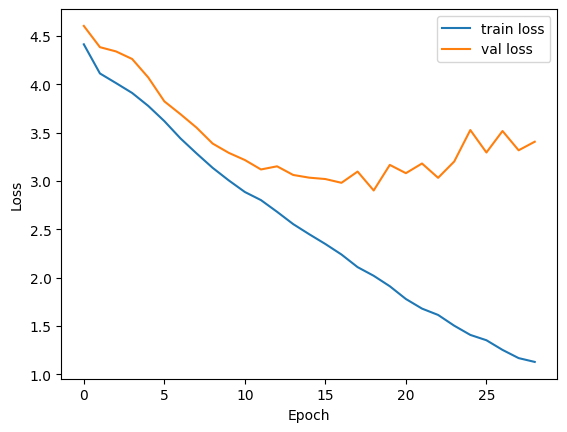

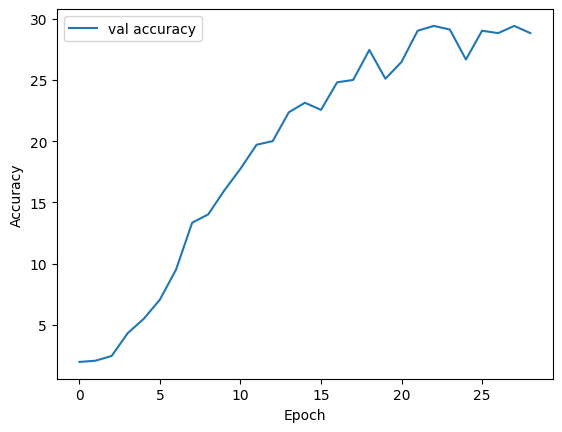

In [5]:
# plot the graphs
import matplotlib.pyplot as plt
plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(val_acc_list, label="val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()